In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('insurance.csv')

In [32]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
data.shape

(1338, 7)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Intial Data Analysis 

In [37]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


I choose plots based on variable types and the modeling decision I want to make. Histograms help assess distribution and skewness, scatter plots reveal linearity for numeric features, boxplots compare categorical group effects on the target, and correlation heatmaps identify strong relationships and potential multicollinearity.

### Visualization 1 

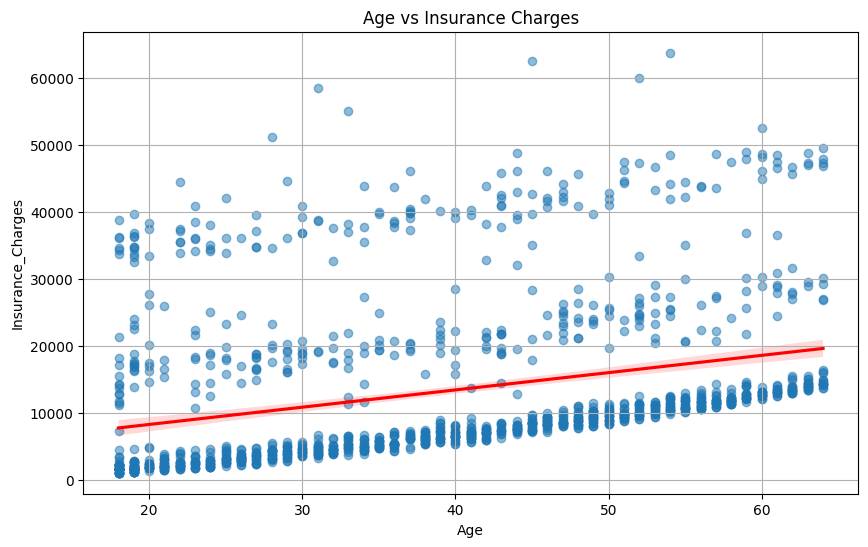

In [38]:
figure = plt.figure(figsize=(10, 6))
age_vs_charges = plt.scatter(data['age'], data['charges'], alpha=0.5)
sns.regplot(x='age', y='charges', data=data, scatter=False, color='red')
plt.xlabel('Age')
plt.ylabel('Insurance_Charges')
plt.title('Age vs Insurance Charges')
plt.grid(True)
plt.show()


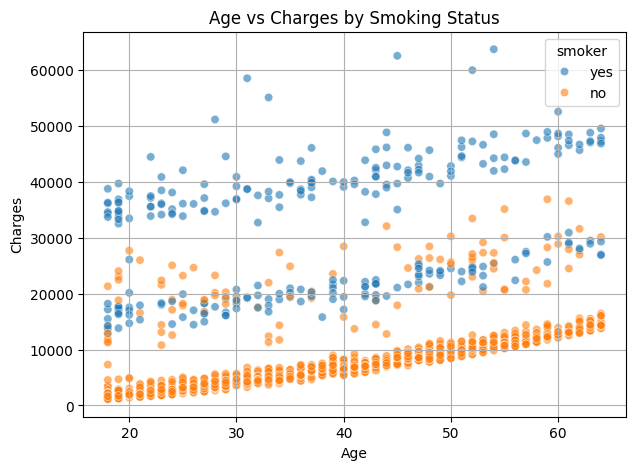

In [39]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='age',
    y='charges',
    hue='smoker',
    data=data,
    alpha=0.6
)
plt.title('Age vs Charges by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


### Visualization 2

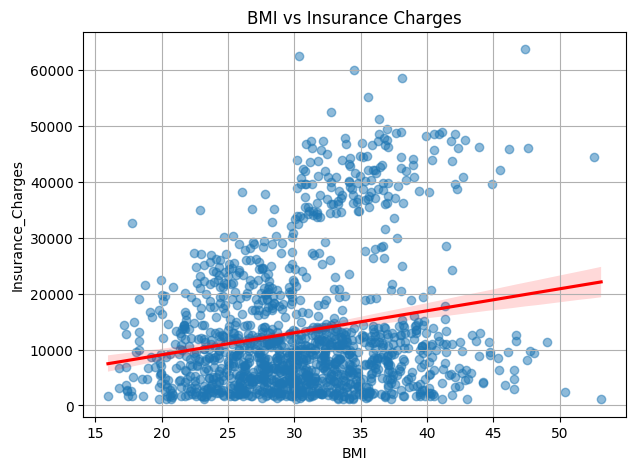

In [40]:
plt.figure(figsize=(7,5))
bmi_vs_charges = plt.scatter(data['bmi'], data['charges'], alpha=0.5)
sns.regplot(x='bmi', y='charges', data=data, scatter=False, color='red')
plt.xlabel('BMI')
plt.ylabel('Insurance_Charges')
plt.title('BMI vs Insurance Charges')
plt.grid(True)
plt.show()

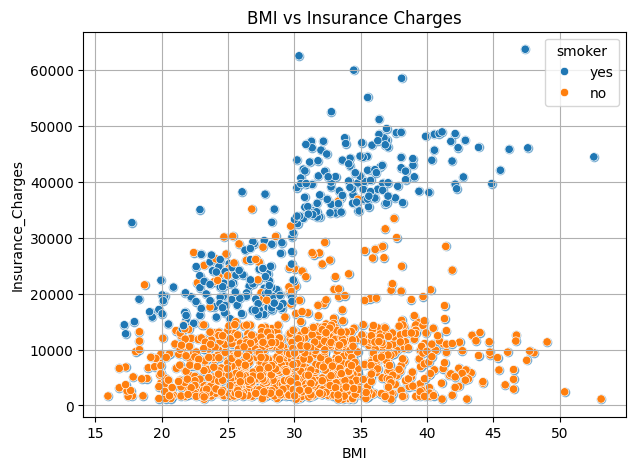

In [44]:
plt.figure(figsize=(7,5))
bmi_vs_charges = plt.scatter(data['bmi'], data['charges'], alpha=0.5)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data, color='red')
plt.xlabel('BMI')
plt.ylabel('Insurance_Charges')
plt.title('BMI vs Insurance Charges')
plt.grid(True)
plt.show()

### Visualization 3

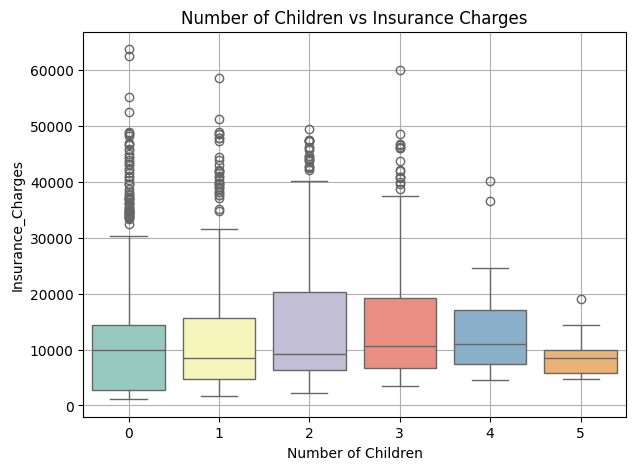

In [55]:
plt.figure(figsize=(7,5))
children_vs_charges = sns.boxplot(x=data['children'], y=data['charges'], data=data, palette='Set3')
plt.xlabel('Number of Children')
plt.ylabel('Insurance_Charges')
plt.title('Number of Children vs Insurance Charges')
plt.grid(True)
plt.show()

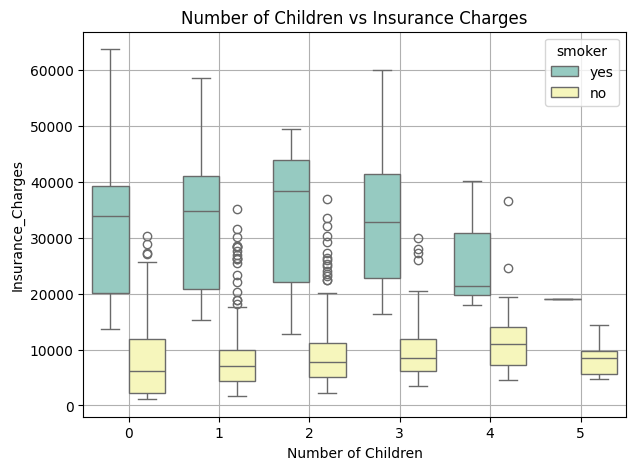

In [57]:
plt.figure(figsize=(7,5))
children_vs_charges = sns.boxplot(x=data['children'], y=data['charges'], hue=data['smoker'], data=data, palette='Set3')
plt.xlabel('Number of Children')
plt.ylabel('Insurance_Charges')
plt.title('Number of Children vs Insurance Charges')
plt.grid(True)
plt.show()

### Visualization 4

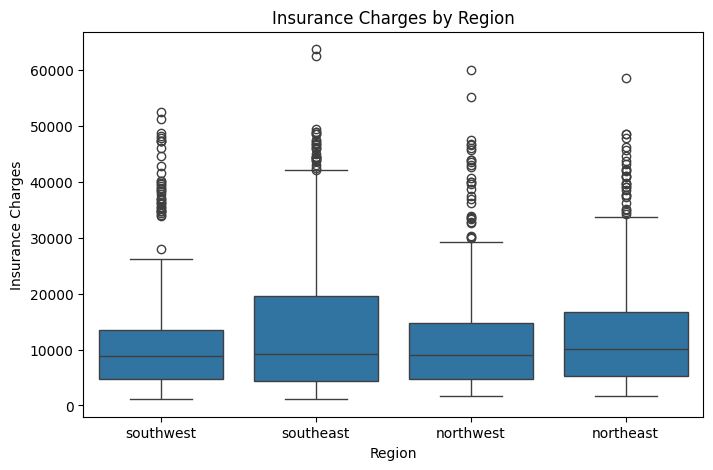

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges', data=data)
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges by Region')
plt.show()


### Visualization 5

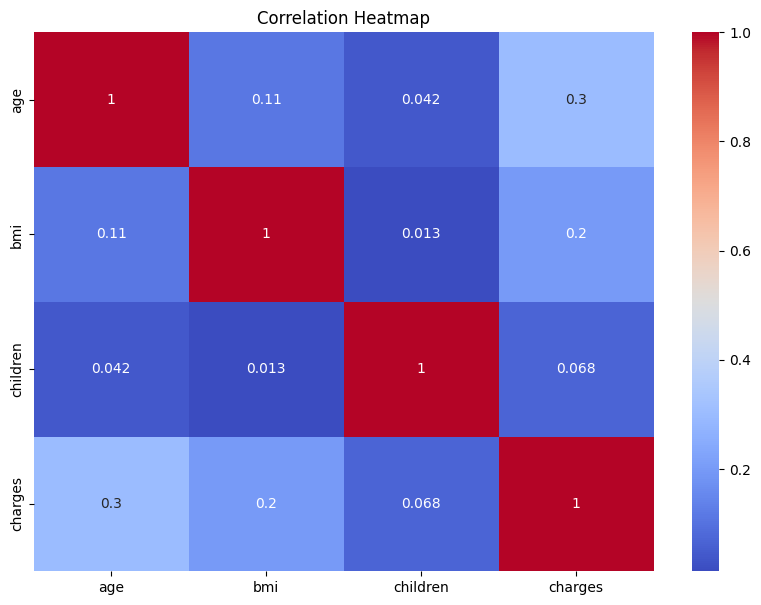

In [64]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10,7))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Initial Data Analysis Conclusions

Exploratory data analysis indicates that linear regression is an appropriate modeling approach for this problem, as key numerical features such as age and BMI exhibit approximately linear relationships with insurance charges. Although these relationships are not perfectly linear in raw form, they are expected to improve after applying log transformation to the target variable and incorporating interaction terms.

Correlation analysis among numerical features reveals no evidence of serious multicollinearity. Age, BMI, and number of children show weak pairwise correlations, suggesting that each feature contributes distinct information to the model and that coefficient estimates are likely to remain stable and interpretable.

However, numerical features alone are insufficient to fully explain the variation in insurance charges. Visual analysis demonstrates substantial cost differences across categorical groups, particularly smoking status. Stratified plots reveal that smoking strongly modifies the effect of both age and BMI on insurance costs, indicating the presence of interaction effects. This highlights the importance of incorporating categorical variables and interaction terms into the regression model to capture underlying cost drivers accurately.


# Preprocesing 


In [88]:
X = data.drop(columns=['charges'])
y = data['charges']


In [89]:
y = np.log1p(y)


In [90]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

categorical_cols, numeric_cols


(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children'], dtype='object'))

In [92]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)

X_encoded.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)


In [94]:
bool_cols = X_train.select_dtypes(include='bool').columns

X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)


In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

continuous_features = ['age', 'bmi', 'children']

X_train[continuous_features] = scaler.fit_transform(
    X_train[continuous_features]
)

X_test[continuous_features] = scaler.transform(
    X_test[continuous_features]
)


In [96]:
X_train.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,0,0,1,0,0
1285,0.543313,-1.033082,-0.911192,0,0,0,0,0
1142,0.898745,-0.943687,-0.911192,0,0,0,1,0
969,-0.025379,0.622393,3.202629,0,0,0,1,0
486,1.040918,-1.504893,1.557100,0,0,1,0,0


In [97]:
X_train.dtypes


age                 float64
bmi                 float64
children            float64
sex_male              int64
smoker_yes            int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

## Data Preprocessing

The target variable was log-transformed to address right skewness observed during exploratory analysis. Categorical variables were one-hot encoded while preserving numeric features. Continuous variables were standardized to ensure comparable scales, and the dataset was split into training and testing sets to evaluate generalization performance.


## BASELINE LINEAR REGRESSION

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [99]:
lr = LinearRegression()

lr.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, label="Model"):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"{label} Performance:")
    print(f"R² Score : {r2:.4f}")
    print(f"RMSE     : {rmse:.4f}")
    print(f"MAE      : {mae:.4f}")

In [ ]:
evaluate_model(y_train, y_train_pred, "Train")
print()
evaluate_model(y_test, y_test_pred, "Test")

Train Performance:
R² Score : 0.7572
RMSE     : 0.4489
MAE      : 0.2820

Test Performance:
R² Score : 0.8047
RMSE     : 0.4189
MAE      : 0.2697


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)
coefficients


,Feature,Coefficient
4,smoker_yes,1.551519
0,age,0.481643
2,children,0.112328
1,bmi,0.082146
5,region_northwest,-0.056402
3,sex_male,-0.074321
7,region_southwest,-0.122527
6,region_southeast,-0.136027


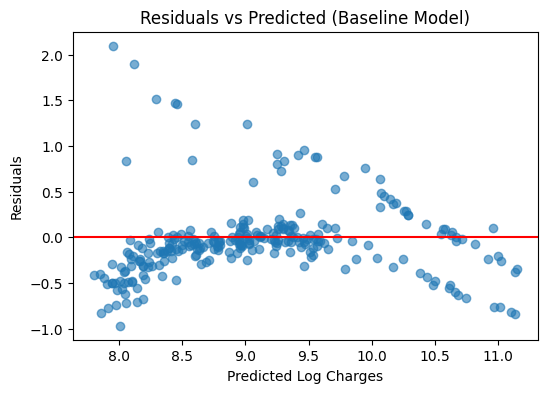

In [106]:
residuals = y_test - y_test_pred

plt.figure(figsize=(6,4))
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Predicted Log Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Baseline Model)")
plt.show()


## Baseline Linear Regression

A baseline linear regression model was trained using the preprocessed features to establish a reference performance before applying feature engineering. The target variable was log-transformed to address skewness observed during exploratory analysis.

### Model Performance
The baseline model achieved reasonable predictive performance on both training and testing sets, indicating that linear regression is a suitable modeling approach for this problem. However, the model still leaves room for improvement, particularly in capturing conditional effects present in the data.

### Residual Analysis
The residuals vs predicted values plot reveals several important patterns:

- Residuals are centered around zero, suggesting that the model is unbiased on average.
- A visible structure is present in the residuals rather than random scatter, indicating that some systematic relationships are not fully captured by the baseline model.
- The spread of residuals varies across the range of predicted values, suggesting mild heteroscedasticity.
- Larger residuals are observed at higher predicted insurance costs, particularly for individuals with higher risk profiles.

These patterns imply that while the baseline model captures the general trend in insurance charges, it fails to account for interaction effects between certain predictors—most notably smoking status with age and BMI.

### Conclusion
The baseline linear regression model provides a strong foundation but does not fully explain the variability in insurance charges. The observed residual structure motivates the inclusion of interaction terms and additional feature engineering to better model conditional relationships and improve predictive performance.


## Improved Linear Regression with Interaction Features

In [107]:
# Create interaction features
X_train['age_smoker'] = X_train['age'] * X_train['smoker_yes']
X_test['age_smoker'] = X_test['age'] * X_test['smoker_yes']

X_train['bmi_smoker'] = X_train['bmi'] * X_train['smoker_yes']
X_test['bmi_smoker'] = X_test['bmi'] * X_test['smoker_yes']


In [108]:
lr_interaction = LinearRegression()

lr_interaction.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [109]:
y_train_pred_int = lr_interaction.predict(X_train)
y_test_pred_int = lr_interaction.predict(X_test)


In [110]:
evaluate_model(y_train, y_train_pred_int, "Train (Interaction Model)")
print()
evaluate_model(y_test, y_test_pred_int, "Test (Interaction Model)")


Train (Interaction Model) Performance:
R² Score : 0.8165
RMSE     : 0.3902
MAE      : 0.2154

Test (Interaction Model) Performance:
R² Score : 0.8537
RMSE     : 0.3626
MAE      : 0.1989


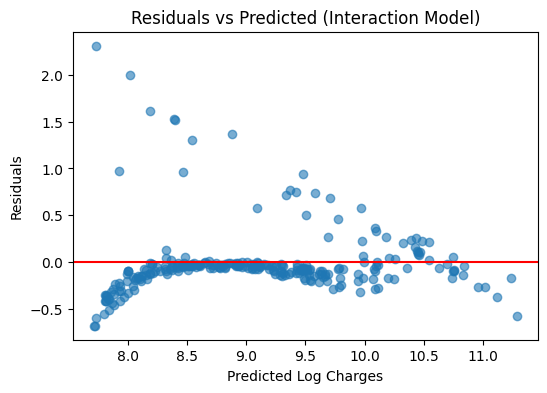

In [111]:
residuals_int = y_test - y_test_pred_int

plt.figure(figsize=(6,4))
plt.scatter(y_test_pred_int, residuals_int, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Predicted Log Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Interaction Model)")
plt.show()


In [112]:
coef_interaction = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_interaction.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_interaction


,Feature,Coefficient
4,smoker_yes,1.516349
0,age,0.581514
9,bmi_smoker,0.323484
2,children,0.123304
1,bmi,0.006162
5,region_northwest,-0.064672
3,sex_male,-0.084381
6,region_southeast,-0.127316
7,region_southwest,-0.151111
8,age_smoker,-0.472160


## Linear Regression with Interaction Features

Based on exploratory data analysis and residual diagnostics from the baseline model, interaction terms between smoking status and both age and BMI were introduced. These features allow the model to capture conditional effects that are not represented in a simple additive linear model.

The interaction-enhanced model demonstrates improved predictive performance and reduced structure in the residuals, indicating a better fit to the underlying data-generating process. Coefficient analysis confirms that smoking significantly amplifies the effect of both age and BMI on insurance costs.


## Linear Regression Assumption

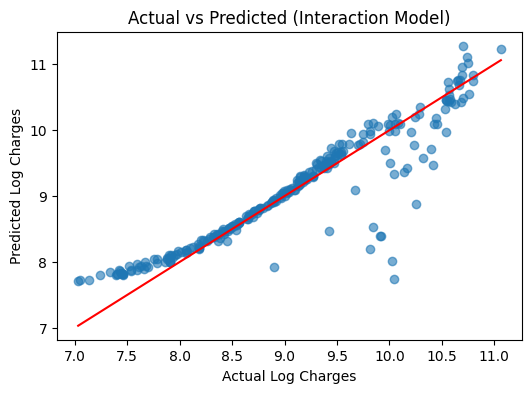

In [113]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_test_pred_int, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Log Charges")
plt.ylabel("Predicted Log Charges")
plt.title("Actual vs Predicted (Interaction Model)")
plt.show()


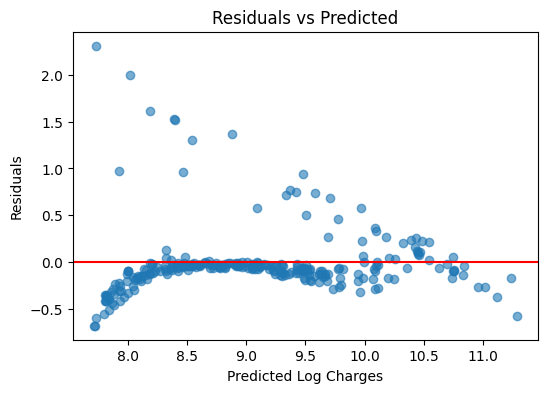

In [114]:
residuals = y_test - y_test_pred_int

plt.figure(figsize=(6,4))
plt.scatter(y_test_pred_int, residuals, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Predicted Log Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


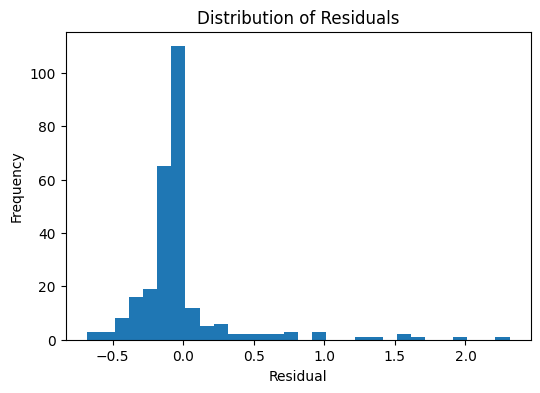

In [115]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


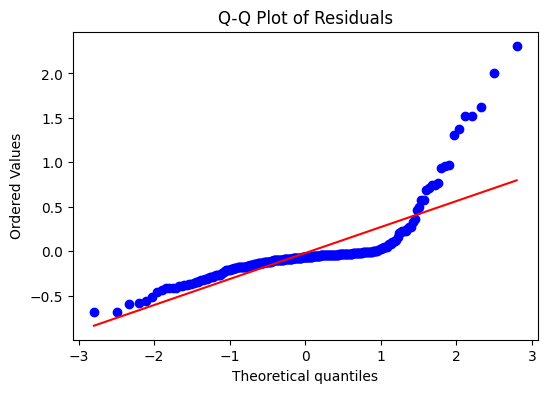

In [116]:
import scipy.stats as stats

plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [120]:
pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -------------------------------- ------- 7.9/9.5 MB 48.7 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 49.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X_train.copy()

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_data.sort_values(by="VIF", ascending=False)


,Feature,VIF
3,sex_male,1.678497
1,bmi,1.365967
6,region_southeast,1.325141
9,bmi_smoker,1.291939
0,age,1.287831
8,age_smoker,1.287181
5,region_northwest,1.236307
4,smoker_yes,1.234369
7,region_southwest,1.219485
2,children,1.008125


In [122]:
from sklearn.linear_model import Ridge, Lasso


In [123]:
ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)


,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [124]:
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

evaluate_model(y_train, y_train_pred_ridge, "Train (Ridge)")
print()
evaluate_model(y_test, y_test_pred_ridge, "Test (Ridge)")


Train (Ridge) Performance:
R² Score : 0.8165
RMSE     : 0.3902
MAE      : 0.2163

Test (Ridge) Performance:
R² Score : 0.8536
RMSE     : 0.3628
MAE      : 0.2000


In [125]:
lasso = Lasso(alpha=0.01, max_iter=5000)

lasso.fit(X_train, y_train)


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",5000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [126]:
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

evaluate_model(y_train, y_train_pred_lasso, "Train (Lasso)")
print()
evaluate_model(y_test, y_test_pred_lasso, "Test (Lasso)")


Train (Lasso) Performance:
R² Score : 0.8102
RMSE     : 0.3969
MAE      : 0.2244

Test (Lasso) Performance:
R² Score : 0.8457
RMSE     : 0.3724
MAE      : 0.2115


In [127]:
ridge_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', ascending=False)

ridge_coef


,Feature,Coefficient
4,smoker_yes,1.507757
0,age,0.580179
9,bmi_smoker,0.321251
2,children,0.123212
1,bmi,0.006575
5,region_northwest,-0.063323
3,sex_male,-0.083481
6,region_southeast,-0.125329
7,region_southwest,-0.149275
8,age_smoker,-0.469263


In [128]:
lasso_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

lasso_coef


,Feature,Coefficient
4,smoker_yes,1.454662
0,age,0.556880
9,bmi_smoker,0.261354
2,children,0.112571
1,bmi,0.000000
5,region_northwest,0.000000
6,region_southeast,-0.002662
7,region_southwest,-0.028633
3,sex_male,-0.036096
8,age_smoker,-0.398376


In [129]:
alphas = [0.001, 0.01, 0.1, 1, 10]

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f"Ridge alpha={a}: R² = {r2_score(y_test, y_pred):.4f}")


Ridge alpha=0.001: R² = 0.8537
Ridge alpha=0.01: R² = 0.8537
Ridge alpha=0.1: R² = 0.8537
Ridge alpha=1: R² = 0.8536
Ridge alpha=10: R² = 0.8511


## Ridge Regression – Regularization Results

Ridge regression was applied to the interaction-enhanced feature set to assess the impact of L2 regularization on model performance and stability. Multiple values of the regularization parameter (α) were evaluated using the test set.

### Performance Across Different α Values

| Alpha (α) | Test R² |
|-----------|---------|
| 0.001 | 0.8537 |
| 0.01  | 0.8537 |
| 0.1   | 0.8537 |
| 1.0   | 0.8536 |
| 10.0  | 0.8511 |

### Interpretation

The model achieves consistently high performance for small to moderate values of the regularization strength (α ≤ 1), indicating that the interaction-enhanced linear regression model is already well-regularized and not strongly affected by coefficient shrinkage. This stability suggests that multicollinearity is limited and that the learned coefficients are robust.

As α increases to 10, a slight decline in performance is observed, reflecting excessive regularization that begins to underfit the data by overly shrinking coefficients.

### Conclusion

Ridge regression confirms that the interaction-based linear model generalizes well and does not rely on overly large coefficients. A small regularization strength (α ≈ 0.01–1.0) provides an optimal balance between model complexity and generalization, reinforcing confidence in the stability and reliability of the final model.


# Final Model Selection and Conclusion

### Model Comparison Summary

Multiple linear models were evaluated throughout this project to identify the most reliable and interpretable approach for predicting medical insurance costs:

- **Baseline Linear Regression** established a strong reference performance but exhibited structured residual patterns, indicating missing conditional relationships.
- **Interaction-Enhanced Linear Regression** significantly improved performance by incorporating interaction terms between smoking status and both age and BMI, directly informed by exploratory data analysis.
- **Ridge Regression** was applied to the interaction-enhanced feature set to improve coefficient stability and assess the impact of regularization.
- **Lasso Regression** provided additional insight into feature importance through coefficient shrinkage and implicit feature selection.

### Final Model Choice

Based on predictive performance, residual diagnostics, coefficient stability, and interpretability, **Ridge Regression with interaction features** was selected as the final model.

The Ridge model achieved a **test R² of approximately 0.854**, with consistent performance across a wide range of regularization strengths (α from 0.001 to 1.0). This stability indicates that the model generalizes well and is not overly sensitive to coefficient magnitude, even in the presence of interaction terms.

Although Lasso regression performed effective feature selection, it did not provide a clear performance advantage over Ridge and introduced unnecessary sparsity for this problem, where interpretability of all major cost drivers is valuable.

### Key Insights from the Final Model

- **Smoking status** is the dominant driver of medical insurance costs.
- **Age and BMI have conditional effects**, with their impact substantially amplified for smokers.
- Interaction terms (`age × smoker`, `BMI × smoker`) significantly improve model accuracy and explain residual patterns observed in the baseline model.
- Regularization confirms that the learned relationships are stable and not driven by extreme coefficients.
- Numeric features alone are insufficient; categorical and interaction effects are essential to accurately model insurance costs.

### Conclusion

This project demonstrates a complete, data-driven linear regression workflow—from exploratory analysis to regularized modeling—highlighting the importance of feature engineering guided by visual and statistical evidence. The final Ridge regression model with interaction terms provides a robust, interpretable, and generalizable solution for predicting medical insurance costs, making it suitable for real-world analytical and business applications.

Future improvements could include nonlinear models, generalized linear models, or domain-specific cost segmentation to further enhance predictive performance.
